CPSC 483 PROJECT #3 <BR>
BRENDON LINTHURST <BR>
5/13/2020

<strong>EXPERIMENTS:</strong>

# 1. Use a support vector machine with a linear kernel to fit and score a binary classifier for dataset 1.

In [7]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from matplotlib import colors
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Re-using dataset1.csv from last project.
df = pd.read_csv("dataset1.csv")
X1 = df[['x1','x2']].to_numpy()
t1 = np.ravel(df[['target']].to_numpy())

# Fit and score using svm
linear_kernel_1 = svm.SVC(kernel = 'linear', gamma = 'scale').fit(X1, t1)
linear_kernel_1_score = linear_kernel_1.score(X1, t1)
print(linear_kernel_1_score)

1.0


ANSWER #1: The score is 1.0

# 2. Use your code from Project 2 to plot the decision boundary for experiment (1). Since SVMs are non-probabilistic classifiers you will need to use predict instead of predict_proba.

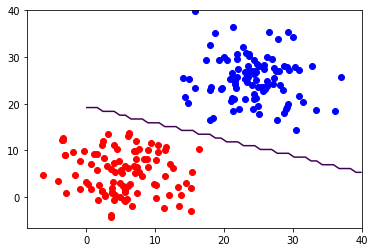

In [8]:
# Code from Project 2 modified to use predict
xlim = 0
ylim = 40
xx, yy = np.meshgrid(np.linspace(xlim, ylim), np.linspace(xlim, ylim))
Z = linear_kernel_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape)

# Separate classifiers
dataset1_class_0 = df.loc[df['target'] == 0]
dataset1_class_1 = df.loc[df['target'] == 1]


# Plot
fig, ax = plt.subplots()
ax.plot(dataset1_class_0[['x1']], dataset1_class_0[['x2']], 'ro')
ax.plot(dataset1_class_1[['x1']], dataset1_class_1[['x2']], 'bo')
ax.contour(xx, yy, Z, [0.5])

# 3. Repeat experiments (1) and (2) with the 'poly', 'rbf', and 'sigmoid' kernels. Do they produce different decision boundaries?

kernel scores 
poly: 1.0
rbf: 1.0
sigmoid: 0.16


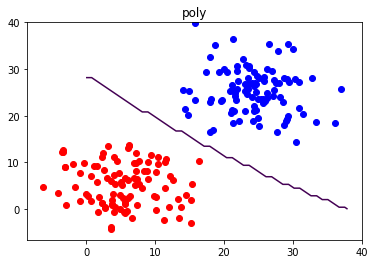

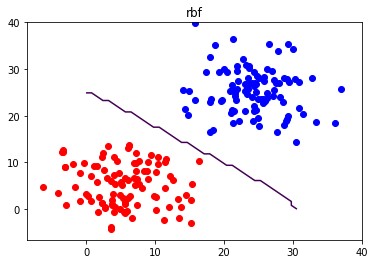

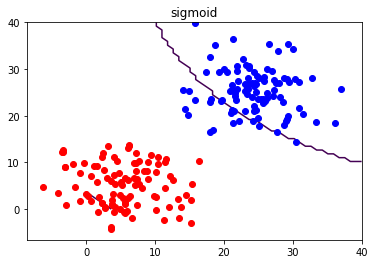

In [9]:
# Fit and score
poly1 = svm.SVC(kernel='poly', gamma='scale').fit(X1, t1) 
poly1_score = poly1.score(X1, t1)

rbf1 = svm.SVC(kernel='rbf', gamma='scale').fit(X1, t1) 
rbf1_score = rbf1.score(X1, t1)

sigmoid1 = svm.SVC(kernel='sigmoid', gamma='scale').fit(X1, t1) 
sigmoid1_score = sigmoid1.score(X1, t1)

# Plot
xx, yy = np.meshgrid(np.linspace(xlim, ylim), np.linspace(xlim, ylim))
Z = poly1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape) 
fig, ax = plt.subplots()
ax.plot(dataset1_class_0[['x1']], dataset1_class_0[['x2']], 'ro')
ax.plot(dataset1_class_1[['x1']], dataset1_class_1[['x2']], 'bo')
ax.contour(xx, yy, Z, [0.5])
ax.set(title="poly")

Z = rbf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape) 
fig, ax = plt.subplots()
ax.plot(dataset1_class_0[['x1']], dataset1_class_0[['x2']], 'ro')
ax.plot(dataset1_class_1[['x1']], dataset1_class_1[['x2']], 'bo')
ax.contour(xx, yy, Z, [0.5])
ax.set(title="rbf")

Z = sigmoid1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape) 
fig, ax = plt.subplots()
ax.plot(dataset1_class_0[['x1']], dataset1_class_0[['x2']], 'ro')
ax.plot(dataset1_class_1[['x1']], dataset1_class_1[['x2']], 'bo')
ax.contour(xx, yy, Z, [0.5])
ax.set(title="sigmoid")

print("kernel scores \n======================")
print("poly:", poly1_score)
print("rbf:", rbf1_score)
print("sigmoid:", sigmoid1_score)

ANSWER #3: Yes, they all produce distinct boundaries

# 4. Repeat experiments (1) through (3) with dataset 2. Which kernel produces the best decision boundary?

kernel scores (dataset 2) 
poly: 0.815
rbf: 1.0
sigmoid: 0.42


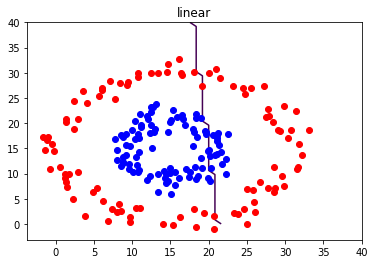

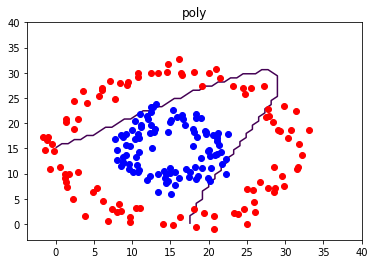

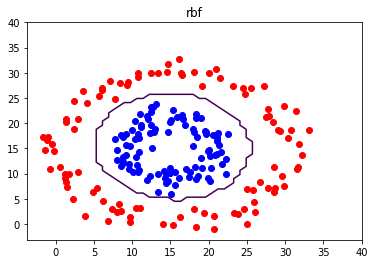

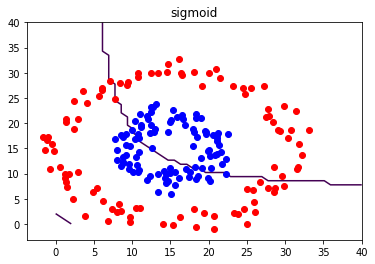

In [10]:
# Read dataset2
df = pd.read_csv("dataset2.csv")
X2 = df[['x1', 'x2']].to_numpy()
t2 = np.ravel(df[['target']].to_numpy())

# Organize classifiers
dataset2_class_0 = df.loc[df['target'] == 0]
dataset2_class_1 = df.loc[df['target'] == 1]

# Fit and score for models
linear_kernel_2 = svm.SVC(kernel='linear', gamma='scale').fit(X2, t2) 
linear_kernel_2_score = linear_kernel_2.score(X2, t2)
poly2 = svm.SVC(kernel='poly', gamma='scale').fit(X2, t2) 
poly2_score = poly2.score(X2, t2)
rbf2 = svm.SVC(kernel='rbf', gamma='scale').fit(X2, t2) 
rbf2_score = rbf2.score(X2, t2)
sigmoid2 = svm.SVC(kernel='sigmoid', gamma='scale').fit(X2, t2) 
sigmoid2_score = sigmoid2.score(X2, t2)

# Plot decision boundaries models trained on dataset 2
xx, yy = np.meshgrid(np.linspace(xlim, ylim), np.linspace(xlim, ylim))
Z = linear_kernel_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape) 
fig, ax = plt.subplots()
ax.plot(dataset2_class_0[['x1']], dataset2_class_0[['x2']], 'ro')
ax.plot(dataset2_class_1[['x1']], dataset2_class_1[['x2']], 'bo')
ax.contour(xx, yy, Z, [0.5])
ax.set(title="linear")

Z = poly2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape) 
fig, ax = plt.subplots()
ax.plot(dataset2_class_0[['x1']], dataset2_class_0[['x2']], 'ro')
ax.plot(dataset2_class_1[['x1']], dataset2_class_1[['x2']], 'bo')
ax.contour(xx, yy, Z, [0.5])
ax.set(title="poly")

Z = rbf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape) 
fig, ax = plt.subplots()
ax.plot(dataset2_class_0[['x1']], dataset2_class_0[['x2']], 'ro')
ax.plot(dataset2_class_1[['x1']], dataset2_class_1[['x2']], 'bo')
ax.contour(xx, yy, Z, [0.5])
ax.set(title="rbf")

Z = sigmoid2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape) 
fig, ax = plt.subplots()
ax.plot(dataset2_class_0[['x1']], dataset2_class_0[['x2']], 'ro')
ax.plot(dataset2_class_1[['x1']], dataset2_class_1[['x2']], 'bo')
ax.contour(xx, yy, Z, [0.5])
ax.set(title="sigmoid")

print("kernel scores (dataset 2) \n======================")
print("poly:", poly2_score)
print("rbf:", rbf2_score)
print("sigmoid:", sigmoid2_score)

ANSWER #4: Definitely RBF. The score is prefect 1.0 and looking at the graph confirms it.

# 5. Try changing the degree for the 'poly' kernel from the default degree 3 to degree 5. Plot the decision boundary and create a confusion matrix for both models. What differences do you observe between the two?

confusion matrix for third degree polynomial
	 TRUE FALSE
POSITIVE  96 33
NEGATIVE   4 67

confusion matrix for fifth degree polynomial
	 TRUE FALSE
POSITIVE  99 23
NEGATIVE   1 77


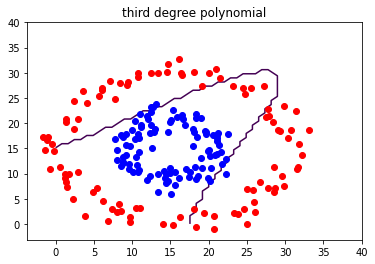

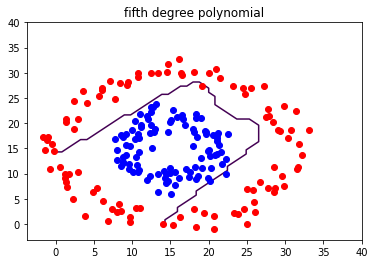

In [17]:
# Fit and score data for poly kernel degree 5
poly2_degree_5 = svm.SVC(kernel='poly', degree=5, gamma='scale').fit(X2, t2) 
poly2_degree_5_score = poly2_degree_5.score(X2, t2)

# Plot
Z = poly2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape) 
fig, ax = plt.subplots()
ax.plot(dataset2_class_0[['x1']], dataset2_class_0[['x2']], 'ro')
ax.plot(dataset2_class_1[['x1']], dataset2_class_1[['x2']], 'bo')
ax.contour(xx, yy, Z, [0.5])
ax.set(title="third degree polynomial")

Z = poly2_degree_5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape) 
fig, ax = plt.subplots()
ax.plot(dataset2_class_0[['x1']], dataset2_class_0[['x2']], 'ro')
ax.plot(dataset2_class_1[['x1']], dataset2_class_1[['x2']], 'bo')
ax.contour(xx, yy, Z, [0.5])
ax.set(title="fifth degree polynomial")

# confusion matrix 
prediction3 = poly2.predict(X2)
prediction5 = poly2_degree_5.predict(X2)
tn3, fp3, fn3, tp3 = confusion_matrix(t2, prediction3).ravel()
tn5, fp5, fn5, tp5 = confusion_matrix(t2, prediction5).ravel()

print("confusion matrix for third degree polynomial\n=================================================")
print("\t TRUE FALSE")
print("POSITIVE ", tp3, fp3)
print("NEGATIVE  ", fn3, tn3)
print("")
print("confusion matrix for fifth degree polynomial\n=================================================")
print("\t TRUE FALSE")
print("POSITIVE ", tp5, fp5)
print("NEGATIVE  ", fn5, tn5)

The fifth degree polynomial has a higher sensitivity and managed to score better. Looking at the plot you can see the one red dot it captured as a false negative.

# 6. Repeat experiments (1) through (3) for dataset 3. Which kernel produces the best decision boundary? Does it seem as if the 'poly' kernel should have scored higher?

kernel scores (dataset 3) 
linear:  0.88
poly:  0.915
rbf:  1.0
sigmoid:  0.62


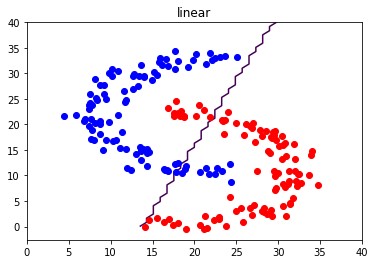

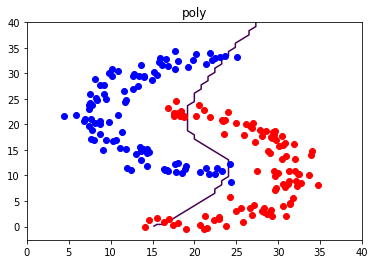

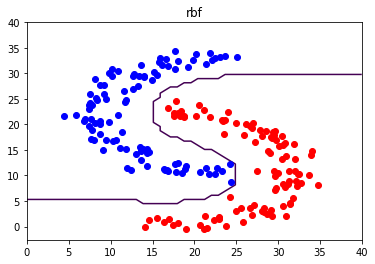

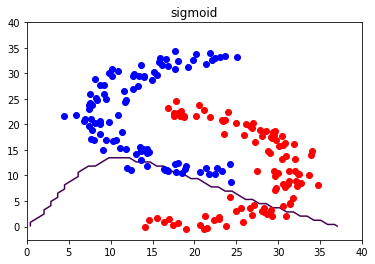

In [21]:
# Import data
df = pd.read_csv("dataset3.csv")
X3 = df[['x1', 'x2']].to_numpy()
t3 = np.ravel(df[['target']].to_numpy())

dataset3_class_0 = df.loc[df['target'] == 0]
dataset3_class_1 = df.loc[df['target'] == 1]

# Fit
linear = svm.SVC(kernel='linear', gamma='scale').fit(X3, t3) 
poly = svm.SVC(kernel='poly', gamma='scale').fit(X3, t3)
rbf = svm.SVC(kernel='rbf', gamma='scale').fit(X3, t3) 
sigmoid = svm.SVC(kernel='sigmoid', gamma='scale').fit(X3, t3) 

# Score
linear_score = linear.score(X3, t3)
poly_score = poly.score(X3, t3)
rbf_score = rbf.score(X3, t3)
sigmoid_score = sigmoid.score(X3, t3)

# Plot (dataset 3)
xx, yy = np.meshgrid(np.linspace(xlim,ylim), np.linspace(xlim, ylim))
Z = linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape) 
fig, ax = plt.subplots()
ax.plot(dataset3_class_0[['x1']], dataset3_class_0[['x2']], 'ro')
ax.plot(dataset3_class_1[['x1']], dataset3_class_1[['x2']], 'bo')
ax.contour(xx, yy, Z, [0.5])
ax.set(title="linear")

Z = poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape) 
fig, ax = plt.subplots()
ax.plot(dataset3_class_0[['x1']], dataset3_class_0[['x2']], 'ro')
ax.plot(dataset3_class_1[['x1']], dataset3_class_1[['x2']], 'bo')
ax.contour(xx, yy, Z, [0.5])
ax.set(title="poly")

# Rbf kernel 
Z = rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape) 
fig, ax = plt.subplots()
ax.plot(dataset3_class_0[['x1']], dataset3_class_0[['x2']], 'ro')
ax.plot(dataset3_class_1[['x1']], dataset3_class_1[['x2']], 'bo')
ax.contour(xx, yy, Z, [0.5])
ax.set(title="rbf")

# Sigmoid kernel 
Z = sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape) 
fig, ax = plt.subplots()
ax.plot(dataset3_class_0[['x1']], dataset3_class_0[['x2']], 'ro')
ax.plot(dataset3_class_1[['x1']], dataset3_class_1[['x2']], 'bo')
ax.contour(xx, yy, Z, [0.5])
ax.set(title="sigmoid")

print("kernel scores (dataset 3) \n======================")
print("linear: ", linear_score)
print("poly: ", poly_score)
print("rbf: ", rbf_score)
print("sigmoid: ", sigmoid_score)

ANSWER #6: It looks like rbf produced the best boundary. It look kinda cool, like a yin yang with a perfect divider. It scored 1.0 indicating it did not missclassify.

I think the poly kernel needs a higher order to classify better. It still does reasonably well with 0.91 score but is not the preferred kernel here.

# 7. Use grid search with cross-validation to determine which combination of hyperparameters produces the best fit for the 'poly' kernel on dataset 3. 

{'C': 0.1, 'coef0': 1.0, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}

confusion matrix for fifth degree polynomial
	 TRUE FALSE
POSITIVE  100 0
NEGATIVE   0 100


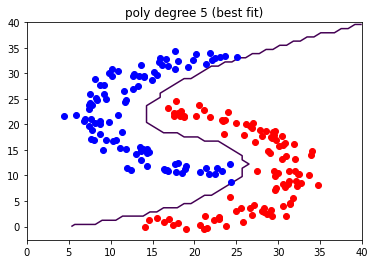

In [32]:
params = [{'C': [0.001, 0.01, 0.1, 1.0], 'degree': [3, 5, 7], 'coef0': [0.01, 0.1, 1.0],
         'gamma': ['scale'], 'kernel': ['poly']}]
clf = GridSearchCV(svm.SVC(), params, cv=5)
clf.fit(X3, t3)
print(clf.best_params_)

# Fit
poly5 = svm.SVC(C=0.1, coef0=1, degree=5, gamma='scale', kernel='poly').fit(X3, t3)

# Plot
xx, yy = np.meshgrid(np.linspace(xlim, ylim), np.linspace(xlim, ylim)) 
Z = poly5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:].reshape(xx.shape) 
fig, ax = plt.subplots()
ax.plot(dataset3_class_0[['x1']], dataset3_class_0[['x2']], 'ro')
ax.plot(dataset3_class_1[['x1']], dataset3_class_1[['x2']], 'bo')
ax.contour(xx, yy, Z, [0.5])
print()
ax.set(title="poly degree 5 (best fit)")

# Confusion matrix

prediction5 = poly5.predict(X3)
tn, fp, fn, tp = confusion_matrix(t3, prediction5).ravel()
print("confusion matrix for fifth degree polynomial\n=================================================")
print("\t TRUE FALSE")
print("POSITIVE ", tp, fp)
print("NEGATIVE  ", fn, tn)

ANSWER #7: The regularization parameter of 0.1, poly degree 5, and coef0 term of 1.0 wound up to be the best params. This confirms my earlier suspicion that a higher degree polynomial would be a stronger model.